In [1]:
# import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
df = pd.read_csv("/Users/maxwellpearse/Library/Mobile Documents/com~apple~CloudDocs/Life/b.Business, Money, Education,  Employment/Python/data_jobs.csv")

# cleaning data
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
import seaborn as sns

In [4]:
# Only get Data Analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

# Drop NaN values from the salary_year_avg column for accurate visualisation
df_DA_US =df_DA_US.dropna(subset=["salary_year_avg"])

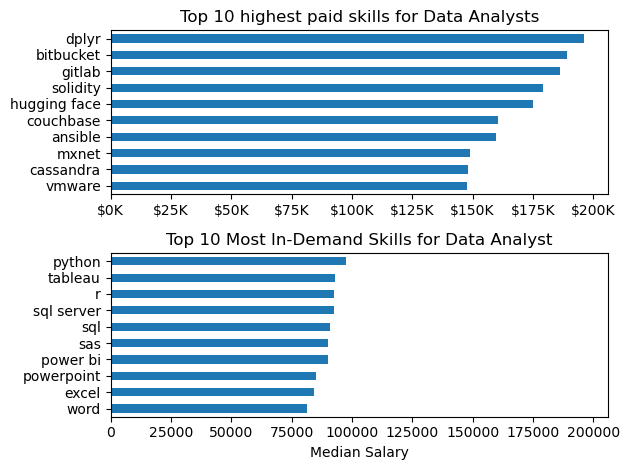

In [ ]:
# from investigate file
df_DA_US = df_DA_US.explode("job_skills")
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
df_DA_top_pay = df_DA_US_group.sort_values(by="median", ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by="count", ascending=False).head(10).sort_values(by="median", ascending=False)

fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 highest paid skills for Data Analysts")  #data seemed really bad anyway
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analyst")  #data seemed really bad anyway
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

fig.tight_layout() # couldn't think of this for a few moments

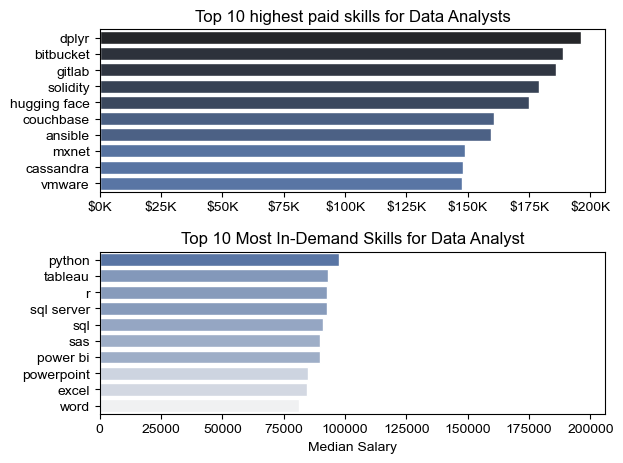

In [17]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="ticks")

#df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r", legend=False)
ax[0].set_title("Top 10 highest paid skills for Data Analysts")  #data seemed really bad anyway
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

#df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1],legend=False)
sns.barplot(data=df_DA_skills, x="median", y=df_DA_skills.index, ax=ax[1], hue="median", palette="light:b", legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analyst")  #data seemed really bad anyway
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

fig.tight_layout() # couldn't think of this for a few moments

Text(12.444444444444445, 0.5, 'Number of Jobs')

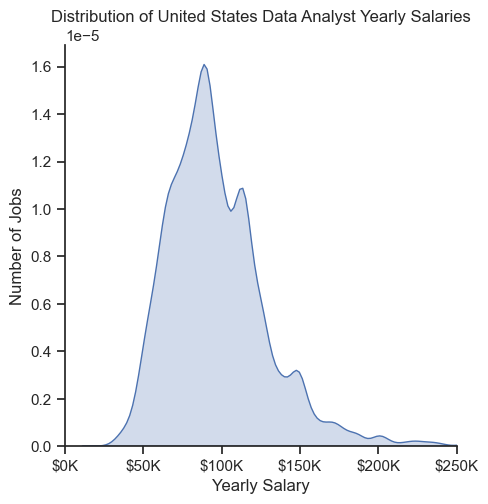

In [ ]:
# from histogram file

#df_DA_US["salary_year_avg"].plot(kind="hist", bins=40, edgecolor="black")
sns.displot(df_DA_US["salary_year_avg"], kind="kde", fill=True,)
plt.xlim(0,250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")

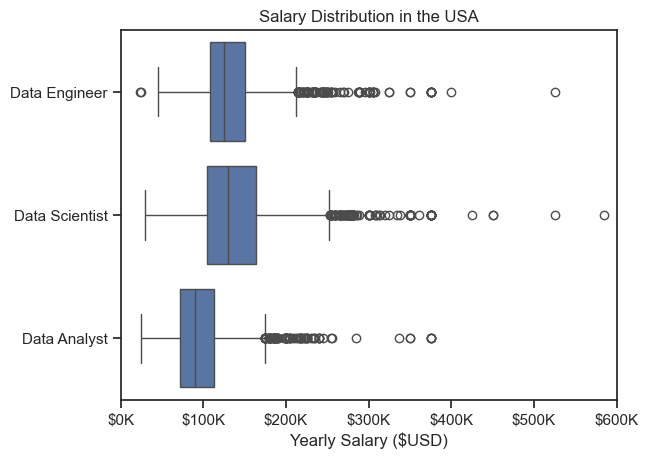

In [24]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()

df_US = df_US.dropna(subset=["salary_year_avg"])

job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles] # im not really understadning this

#plt.boxplot(job_list, labels=job_titles, vert=False)
sns.boxplot(data=df_US, x="salary_year_avg", y="job_title_short" ) # need to do x and y now! y is doing classes do the job titles
plt.title("Salary Distribution in the USA")
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0,600000)
plt.show()